In [327]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.0f}'.format

In [328]:
# Load the WHO mortality data
df_mort = pd.read_csv('../source_data/current_who_mortality_2017_2021.csv')

# Load the WHO population data
df_pop = pd.read_csv('../source_data/current_who_population.csv')

# Display the DataFrames to verify they loaded
display(df_mort.head(2))
display(df_pop.head(2))


,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0,0,0,0,1,0,0,1
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0,0,0,0,1,0,0,1


,Year,Country Code,Country Name,Sex,Pop: All Ages,Pop: 0-1 Years,Pop: 1-24 Years,Pop: 25-44 Years,Pop: 45-69 Years,Pop: 70-95+ Years,Pop: Age Not Specified,Age Format,Pop: Smoketest All Ages
0,2009,1520,Tunisia,1 - Male,"5,400,996","95,790","2,684,360","1,048,209","664,435","58,961",0,2,"5,400,996"
1,2009,1520,Tunisia,2 - Female,"5,470,013","88,492","2,576,162","1,157,790","702,202","62,026",0,2,"5,470,013"


# Function to Display the Top 10 Causes of Death in a Year (Country is Optional)

In [329]:
# Create a function to display the top 10 causes of death in a year

def top_causes_death_yearly(df, year, country=""):
    # Step 1: Filter the DataFrame for the specified year and country
    if country:
        filtered_df = df[(df['Year'] == year) & (df['Country Name'] == country)]
    else:
        filtered_df = df[df['Year'] == year]

    # Step 2: Group by ICD codes and sum the number of deaths
    icd_deaths = filtered_df.groupby('ICD Code')['Deaths: All Ages'].sum().reset_index()
    icd_deaths.columns = ['ICD Code', 'Deaths: All Ages']

    # Step 3: Exclude the 'AAA' ICD code
    icd_deaths = icd_deaths[icd_deaths['ICD Code'] != 'AAA']

    # Step 4: Select the top 10 ICD codes based on the total number of deaths
    top_10_icd_codes = icd_deaths.nlargest(10, 'Deaths: All Ages')

    # Step 5: Merge with the ICD Category column
    top_10_with_category = top_10_icd_codes.merge(filtered_df[['ICD Code', 'ICD Category']].drop_duplicates(), on='ICD Code', how='left')

    # Step 6: Return the result
    return top_10_with_category

In [330]:
global_2020 = top_causes_death_yearly(df_mort, 2020)
print(f"The top global causes of death for 2020:\n{global_2020}")
print("***" * 20)
israel_2021 = top_causes_death_yearly(df_mort, 2021, 'Israel')
print(f"The top causes of death for 2021 in Israel were:\n{israel_2021}")

The top global causes of death for 2020:
  ICD Code  Deaths: All Ages  \
0     U071            624177   
1     C349            269087   
2     I219            252688   
3     I251            208005   
4     J189            172954   
5     G309            168186   
6      F03            164883   
7      R54            164267   
8     J449            152925   
9      R99            132996   

                                        ICD Category  
0                         Codes for special purposes  
1                                          Neoplasms  
2                        Circulatory system diseases  
3                        Circulatory system diseases  
4                        Respiratory system diseases  
5                            Nervous system diseases  
6  Mental, behavioral, and neurodevelopmental dis...  
7  Symptoms, signs and abnormal clinical and labo...  
8                        Respiratory system diseases  
9  Symptoms, signs and abnormal clinical and labo...  
*

## Sum up all deaths

In [331]:
df_mort.columns

Index(['Year', 'Country Code', 'Country Name', 'Region', 'Sex', 'ICD Code',
       'ICD Category', 'ICD10 Version', 'Deaths: All Ages',
       'Deaths: 0-1 Years', 'Deaths: 1-24 Years', 'Deaths: 25-44 Years',
       'Deaths: 45-69 Years', 'Deaths: 70-95+ Years',
       'Deaths: Age Not Specified', 'Age Format',
       'Deaths: Smoketest All Ages'],
      dtype='object')

In [332]:
# Create a function to display the top 10 ICD codes in a year for a given country
def top_10_icd_codes_deaths(df, year, country=""):
    # Step 1: Filter the DataFrame for the specified year and country
    if country:
        filtered_df = df[(df['Year'] == year) & (df['Country Name'] == country)]
    else:
        filtered_df = df[df['Year'] == year]
    
    # Ensure 'Deaths: All Ages' column exists in the filtered DataFrame
    if 'Deaths: All Ages' not in filtered_df.columns:
        raise ValueError("'Deaths: All Ages' column is missing from the DataFrame")
    
    # Step 2: Group by ICD codes and sum the "Deaths: All Ages" column
    icd_deaths = filtered_df.groupby('ICD Code')['Deaths: All Ages'].sum().reset_index()
    
    # Step 3: Sort the sums in descending order and select the top 10 ICD codes
    top_icd_deaths = icd_deaths.sort_values(by='Deaths: All Ages', ascending=False).head(10)
    
    # Step 4: Merge with the original DataFrame to get additional columns
    merged_df = pd.merge(top_icd_deaths, df, on='ICD Code', how='left')
    
    # Step 5: Filter the merged DataFrame for the specified year and country again to ensure correctness
    if country:
        merged_df = merged_df[(merged_df['Year'] == year) & (merged_df['Country Name'] == country)]
    else:
        merged_df = merged_df[merged_df['Year'] == year]

    # Step 6: Select the required columns and remove duplicates
    result_df = merged_df[['Year', 'Country Name', 'ICD Code', 'Deaths: All Ages_x', 'ICD Category']].drop_duplicates()
    
    # Rename 'Deaths: All Ages_x' to 'Deaths: All Ages'
    result_df.rename(columns={'Deaths: All Ages_x': 'Deaths: All Ages'}, inplace=True)
    
    # Step 7: Return the resulting DataFrame
    return result_df


## Top 10 global, by year

In [333]:
# 2017
global_2017 = top_10_icd_codes_deaths(df_mort, 2017)
display(global_2017)

# 2018
global_2018 = top_10_icd_codes_deaths(df_mort, 2018)
display(global_2018)

,Year,Country Name,ICD Code,Deaths: All Ages,ICD Category
0,2017,Iceland,AAA,6600541,Infectious and parasitic diseases
2,2017,Tunisia,AAA,6600541,Infectious and parasitic diseases
8,2017,Brazil,AAA,6600541,Infectious and parasitic diseases
20,2017,Canada,AAA,6600541,Infectious and parasitic diseases
22,2017,Chile,AAA,6600541,Infectious and parasitic diseases
...,...,...,...,...,...
1138,2017,Singapore,I509,118914,Circulatory system diseases
1148,2017,Poland,I509,118914,Circulatory system diseases
1183,2017,Japan,I509,118914,Circulatory system diseases
1193,2017,Sweden,I509,118914,Circulatory system diseases


,Year,Country Name,ICD Code,Deaths: All Ages,ICD Category
11,2018,Brazil,AAA,6642894,Infectious and parasitic diseases
25,2018,Chile,AAA,6642894,Infectious and parasitic diseases
36,2018,United States of America,AAA,6642894,Infectious and parasitic diseases
46,2018,Israel,AAA,6642894,Infectious and parasitic diseases
54,2018,Singapore,AAA,6642894,Infectious and parasitic diseases
...,...,...,...,...,...
1150,2018,Poland,I509,124818,Circulatory system diseases
1159,2018,Canada,I509,124818,Circulatory system diseases
1185,2018,Japan,I509,124818,Circulatory system diseases
1195,2018,Sweden,I509,124818,Circulatory system diseases


In [334]:
year = 2021
test_df = df_mort['Country Name'] == 'Israel'
display(test_df.head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Country Name, dtype: bool

In [335]:
# Filter the DataFrame for Israel
israel_df = df_mort[df_mort['Country Name'] == 'Israel']

# Group by year and sum the deaths
deaths_per_year = israel_df.groupby('Year')['Deaths: All Ages'].sum().reset_index()

# Display the result
display(deaths_per_year)

,Year,Deaths: All Ages
0,2017,89192
1,2018,89074
2,2019,92008
3,2020,97594
4,2021,101544


In [336]:
# Function to get sum of deaths, with country optional

def total_deaths(df, country=""):
    if country:
        df_summary = df[df['Country Name'] == country]
    else:
        df_summary = df.copy()
    
    deaths_per_year = df_summary.groupby('Year')['Deaths: All Ages'].sum().reset_index()

    return deaths_per_year

# Example
deaths_per_year = total_deaths(df_mort, country='Brazil')

# Display the result
display(deaths_per_year)

,Year,Deaths: All Ages
0,2017,2625328
1,2018,2633438
2,2019,2699602
3,2020,3113648
4,2021,3665298


In [337]:
# Function to get sum of deaths, with country optional

def total_deaths(df, country=""):
    # Filter out rows with ICD Code "AAA"
    df = df[df['ICD Code'] != 'AAA']

    # Check if the country parameter was included. If it was, add it to the filter and create the df_summary DataFrame.
    if country:
        df_summary = df[df['Country Name'] == country]
    # If the `country` parameter wasn't included, create the df_summary DataFrame without a filter by copying the existing DataFrame.
    else:
        df_summary = df.copy()
    
    # Group the df_summary DataFrame by Year and Deaths: All Ages
    deaths_per_year = df_summary.groupby('Year')['Deaths: All Ages'].sum().reset_index()

    # Format the Deaths: All Ages column to use commas in the numbers
    deaths_per_year['Deaths: All Ages'] = deaths_per_year['Deaths: All Ages'].apply(lambda x: f"{x:,}")

    # Sort the Year column as descending
    deaths_per_year = deaths_per_year.sort_values(by='Year', ascending=False)

    # Return the summary_df DataFrame with the filtered and formatted results

    return deaths_per_year

In [338]:
# Function that calls the `deaths_per_year` function with a list of countries. This reduces us manually typing in each country name.
def display_deaths_for_countries(df, countries):
    for country in countries:
        deaths_per_year = total_deaths(df, country)
        print(f"Deaths Per Year in {country}")
        display(deaths_per_year)

# Get global deaths
global_deaths_per_year = total_deaths(df_mort)
print("Global Deaths Per Year")
display(global_deaths_per_year)

# Get all deaths for each country
countries_list = ['Australia', 'Brazil', 'Canada', 'Chile', 'Iceland', 'Israel', 'Japan', 'Poland', 'Singapore', 'Sweden', 'Tunisia', 'United States of America']

display_deaths_for_countries(df_mort, countries_list)

Global Deaths Per Year


,Year,Deaths: All Ages
4,2021,"8,116,745"
3,2020,"7,603,703"
2,2019,"6,717,207"
1,2018,"6,642,894"
0,2017,"6,600,541"


Deaths Per Year in Australia


,Year,Deaths: All Ages
4,2021,"171,469"
3,2020,"161,300"
2,2019,"168,962"
1,2018,"158,660"
0,2017,"161,083"


Deaths Per Year in Brazil


,Year,Deaths: All Ages
4,2021,"1,832,649"
3,2020,"1,556,824"
2,2019,"1,349,801"
1,2018,"1,316,719"
0,2017,"1,312,664"


Deaths Per Year in Canada


,Year,Deaths: All Ages
4,2021,"311,640"
3,2020,"308,412"
2,2019,"285,301"
1,2018,"285,704"
0,2017,"276,689"


Deaths Per Year in Chile


,Year,Deaths: All Ages
4,2021,"137,629"
3,2020,"126,169"
2,2019,"109,658"
1,2018,"106,796"
0,2017,"106,388"


Deaths Per Year in Iceland


,Year,Deaths: All Ages
4,2021,"2,333"
3,2020,"2,305"
2,2019,"2,277"
1,2018,"2,258"
0,2017,"2,236"


Deaths Per Year in Israel


,Year,Deaths: All Ages
4,2021,"50,772"
3,2020,"48,797"
2,2019,"46,004"
1,2018,"44,537"
0,2017,"44,596"


Deaths Per Year in Japan


,Year,Deaths: All Ages
4,2021,"1,439,856"
3,2020,"1,372,755"
2,2019,"1,381,093"
1,2018,"1,362,470"
0,2017,"1,340,397"


Deaths Per Year in Poland


,Year,Deaths: All Ages
4,2021,"519,517"
3,2020,"477,355"
2,2019,"409,709"
1,2018,"414,200"
0,2017,"402,852"


Deaths Per Year in Singapore


,Year,Deaths: All Ages
4,2021,"23,270"
3,2020,"20,985"
2,2019,"20,288"
1,2018,"20,095"
0,2017,"19,763"


Deaths Per Year in Sweden


,Year,Deaths: All Ages
4,2021,"92,079"
3,2020,"98,652"
2,2019,"89,276"
1,2018,"92,250"
0,2017,"92,075"


Deaths Per Year in Tunisia


,Year,Deaths: All Ages
2,2021,"71,300"
1,2020,"46,420"
0,2017,"28,295"


Deaths Per Year in United States of America


,Year,Deaths: All Ages
4,2021,"3,464,231"
3,2020,"3,383,729"
2,2019,"2,854,838"
1,2018,"2,839,205"
0,2017,"2,813,503"


In [339]:
df_mort.columns

Index(['Year', 'Country Code', 'Country Name', 'Region', 'Sex', 'ICD Code',
       'ICD Category', 'ICD10 Version', 'Deaths: All Ages',
       'Deaths: 0-1 Years', 'Deaths: 1-24 Years', 'Deaths: 25-44 Years',
       'Deaths: 45-69 Years', 'Deaths: 70-95+ Years',
       'Deaths: Age Not Specified', 'Age Format',
       'Deaths: Smoketest All Ages'],
      dtype='object')

In [340]:
df_mort.head(5)

,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0,0,0,0,1,0,0,1
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0,0,0,0,1,0,0,1
2,2017,4160,Iceland,Northern Europe,1 - Male,A08,Infectious and parasitic diseases,103,1,0,0,0,0,1,0,0,1
3,2017,4160,Iceland,Northern Europe,1 - Male,A32,Infectious and parasitic diseases,103,1,0,0,0,0,0,0,0,1
4,2017,4160,Iceland,Northern Europe,1 - Male,A41,Infectious and parasitic diseases,103,4,0,0,0,2,2,0,0,4


In [341]:
# Filter the DataFrame to only show rows with the ICD code 'U071'
df_covid_filtered = df_mort[df_mort['ICD Code'].isin(['U071','U072'])]
df_covid_rel_filtered = df_mort[df_mort['ICD Code'] == 'U072']

# Display the filtered DataFrame
display(df_covid_filtered.head(2))
display(df_covid_rel_filtered.head(2))

,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
3277,2020,1520,Tunisia,Africa,1 - Male,U071,Codes for special purposes,104,1492,6,11,42,639,315,210,1,"1,492"
3278,2020,1520,Tunisia,Africa,1 - Male,U072,Codes for special purposes,104,150,1,4,14,59,27,19,1,150


,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
3278,2020,1520,Tunisia,Africa,1 - Male,U072,Codes for special purposes,104,150,1,4,14,59,27,19,1,150
4227,2020,1520,Tunisia,Africa,2 - Female,U072,Codes for special purposes,104,80,0,4,5,26,25,7,1,80


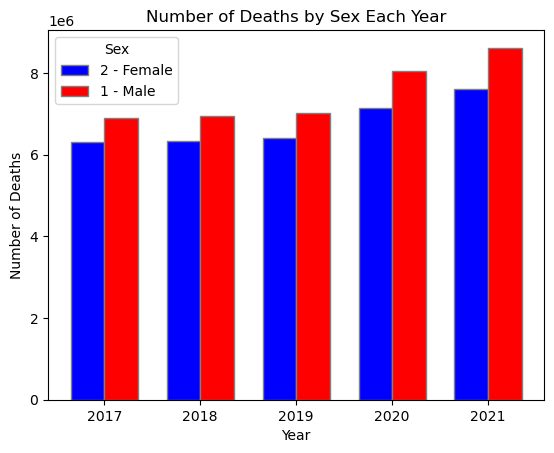

In [342]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'Year' and 'Sex' and sum the deaths
df_grouped = df_mort.groupby(['Year', 'Sex'])['Deaths: All Ages'].sum().reset_index()

# Pivot the data to have 'Year' as index and 'Sex' as columns
df_pivot = df_grouped.pivot(index='Year', columns='Sex', values='Deaths: All Ages')

# Create a new DataFrame for side-by-side bars
df_pivot = df_pivot.reset_index()

# Define the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(df_pivot))
r2 = [x + bar_width for x in r1]

# Plot the data
plt.bar(r1, df_pivot['2 - Female'], color='b', width=bar_width, edgecolor='grey', label='2 - Female')
plt.bar(r2, df_pivot['1 - Male'], color='r', width=bar_width, edgecolor='grey', label='1 - Male')

# Add title and labels
plt.title('Number of Deaths by Sex Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks([r + bar_width / 2 for r in range(len(df_pivot))], df_pivot['Year'])
plt.legend(title='Sex')

# Show the plot
plt.show()

In [343]:
# Group by 'Year' and 'Sex' and sum the deaths
df_filter_icd_aaa = df_mort[df_mort['ICD Code'] != 'AAA']
df_grouped = df_filter_icd_aaa.groupby(['Year', 'Sex'])
sum_yearly_deaths_by_sex = df_grouped[['Deaths: All Ages']].sum()

sum_yearly_deaths_by_sex

Deaths: All Ages
Year Sex                              
2017 1 - Male                  3445978
     2 - Female                3151265
     9 - Unspecified              3298
2018 1 - Male                  3469057
     2 - Female                3173171
     9 - Unspecified               666
2019 1 - Male                  3509727
     2 - Female                3206834
     9 - Unspecified               646
2020 1 - Male                  4023972
     2 - Female                3574911
     9 - Unspecified              4820
2021 1 - Male                  4310107
     2 - Female                3801725
     9 - Unspecified              4913

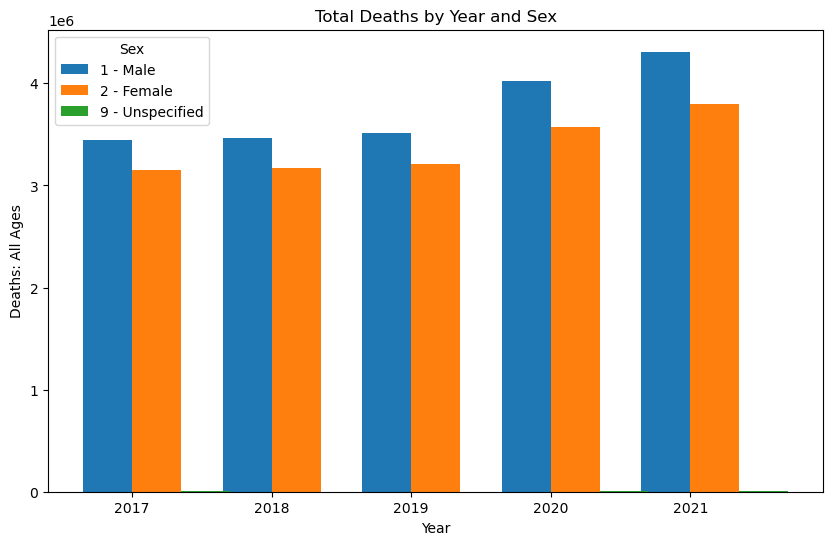

In [344]:
# Calculate and plot total deaths by Sex, year-over-year

# Group by 'Year' and 'Sex' and sum the deaths
df_filter_icd_aaa = df_mort[df_mort['ICD Code'] != 'AAA']
df_grouped = df_filter_icd_aaa.groupby(['Year', 'Sex'])
sum_yearly_deaths_by_sex = df_grouped[['Deaths: All Ages']].sum().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.35

# Get the unique years and sexes
years = sum_yearly_deaths_by_sex['Year'].unique()
sexes = sum_yearly_deaths_by_sex['Sex'].unique()

# Create an array of positions for the bars
r = np.arange(len(years))

# Plot each sex's data
for i, sex in enumerate(sexes):
    subset = sum_yearly_deaths_by_sex[sum_yearly_deaths_by_sex['Sex'] == sex]
    plt.bar(r + i * bar_width, subset['Deaths: All Ages'], width=bar_width, label=sex)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Deaths: All Ages')
plt.title('Total Deaths by Year and Sex')
plt.xticks(r + bar_width / 2, years)
plt.legend(title='Sex')
plt.show()

In [345]:
# Group by 'Year' and sum the deaths
df_grouped = df_mort.groupby('Year')
sum_yearly_deaths = df_grouped[['Deaths: All Ages']].sum()

sum_yearly_deaths

,Deaths: All Ages
Year,
2017,13201082
2018,13285788
2019,13434414
2020,15207406
2021,16233490


In [346]:
# Filter the dataframe to show COVID trends and exclude ICD Code 'AAA'
df_covid_filtered = df_mort[df_mort['ICD Code'].isin(['U071', 'U072']) & (df_mort['ICD Code'] != 'AAA')]

# Group by 'Year', 'Country Name', and 'Sex' and sum the deaths
df_covid_grouped = df_covid_filtered.groupby(['Year', 'Country Name', 'Sex'])[['Deaths: All Ages']].sum().reset_index()

# Calculate the total deaths for each 'Year' and 'Country Name'
df_covid_grouped['All Deaths'] = df_covid_grouped.groupby(['Year', 'Country Name'])['Deaths: All Ages'].transform('sum')

# Pivot the data to have 'Year' and 'Country Name' as index and 'Sex' as columns
df_covid_pivot = df_covid_grouped.pivot(index=['Year', 'Country Name'], columns='Sex', values='Deaths: All Ages')

# Add the 'All Deaths' column to the pivoted DataFrame
df_covid_pivot['All Deaths'] = df_covid_grouped.drop_duplicates(subset=['Year', 'Country Name'])[['Year', 'Country Name', 'All Deaths']].set_index(['Year', 'Country Name'])['All Deaths']

# Convert the 'Sex' columns and 'All Deaths' column to integers
df_covid_pivot = df_covid_pivot.fillna(0).astype(int)

# Format the columns to use commas
df_covid_pivot = df_covid_pivot.applymap(lambda x: f"{x:,}")

# Display the pivoted DataFrame
display(df_covid_pivot)

/var/folders/rr/f4rnf7xj5tj1x2gknbjs4mxm0000gn/T/ipykernel_35637/869924589.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_covid_pivot = df_covid_pivot.applymap(lambda x: f"{x:,}")


Sex                           1 - Male 2 - Female 9 - Unspecified All Deaths
Year Country Name                                                           
2020 Australia                     439        461               0        900
     Brazil                    121,641     91,051              14    212,706
     Canada                      7,889      8,424               0     16,313
     Chile                      10,795      7,885               0     18,680
     Iceland                        16         14               0         30
     Israel                      1,823      1,337               0      3,160
     Japan                       2,094      1,372               0      3,466
     Poland                     23,966     17,485               0     41,451
     Singapore                      18          7               0         25
     Sweden                      5,126      4,403              18      9,547
     Tunisia                     1,642        930             262      2,834
     United States of America  192,512    158,319               0    350,831
2021 Australia                     660        462               0      1,122
     Brazil                    235,786    188,597              49    424,432
     Canada                      8,097      6,366               0     14,463
     Chile                      12,839     10,040               0     22,879
     Iceland                         5          1               0          6
     Israel                      2,636      2,164               0      4,800
     Japan                       9,732      7,034               0     16,766
     Poland                     48,274     41,852               0     90,126
     Singapore                     482        329               0        811
     Sweden                      3,106      2,213               0      5,319
     Tunisia                     9,608      7,787           1,496     18,891
     United States of America  236,610    180,283               0    416,893

In [347]:

# Group the Population dataframe by 'Pop: All Ages' column
df_pop_filtered = df_pop[df_pop['Year'].between(2017, 2021)]
df_pop_filtered = df_pop_filtered.groupby(['Year', 'Country Name'])['Pop: All Ages'].sum().reset_index()

# Rename the column to 'Total Population'
df_pop_filtered = df_pop_filtered.rename(columns={'Pop: All Ages': 'Total Population'})

# Convert 'Pop: All Ages' to millions
# df_pop_filtered['Total Population'] = df_pop_filtered['Total Population'] / 1_000_000

# df_pop_filtered = df_pop_filtered.rename(columns={'Total Population':'Population in Millions'})

# Display the first few rows
display(df_pop_filtered)

,Year,Country Name,Total Population
0,2017,Australia,"24,594,202"
1,2017,Iceland,"343,400"
2,2017,Israel,"8,713,268"
3,2017,Japan,"124,648,471"
4,2017,Poland,"37,962,318"
5,2017,Singapore,"3,965,796"
6,2017,Sweden,"10,057,698"
7,2018,Australia,"24,963,258"
8,2018,Iceland,"352,720"
9,2018,Israel,"8,882,765"


In [348]:
# Create a DataFrame of deaths per year in  millions

# Group by Year + Country and Deaths
df_filtered_grouped_deaths = df_mort[df_mort['ICD Code'] != 'AAA']
df_grouped_deaths = df_filtered_grouped_deaths.groupby(['Year', 'Country Name'])['Deaths: All Ages'].sum().reset_index()

# Rename columns
df_grouped_deaths = df_grouped_deaths.rename(columns={'Deaths: All Ages':'All Causes of Death'})

# Convert the 'All Deaths' column to integer
df_grouped_deaths['All Causes of Death'] = df_grouped_deaths['All Causes of Death'].fillna(0).astype(int)

# Apply comma formatting
# df_grouped_deaths['All Causes of Death'] = df_grouped_deaths['All Causes of Death'].map(lambda x: f"{x:,}")

# Display first few rows
display(df_grouped_deaths.head())

,Year,Country Name,All Causes of Death
0,2017,Australia,161083
1,2017,Brazil,1312664
2,2017,Canada,276689
3,2017,Chile,106388
4,2017,Iceland,2236


In [349]:


# Group by Year + Country and Deaths
df_filtered_grouped_deaths = df_mort[df_mort['ICD Code'] == 'AAA']
df_grouped_deaths = df_filtered_grouped_deaths.groupby(['Year', 'Country Name'])['Deaths: All Ages'].sum().reset_index()

# Rename columns
df_grouped_deaths = df_grouped_deaths.rename(columns={'Deaths: All Ages':'All Causes of Death'})

# Convert the 'All Deaths' column to integer
df_grouped_deaths['All Causes of Death'] = df_grouped_deaths['All Causes of Death'].fillna(0).astype(int)

# Merge the two DataFrames on 'Year' and 'Country Name'
df_merged = pd.merge(df_pop_filtered, df_grouped_deaths, on=['Year', 'Country Name'])

# Calculate the percentage of the population that died in each year
df_merged['Percentage'] = (df_merged['All Causes of Death'] / df_merged['Total Population']) * 100

# Apply comma formatting to the 'All Causes of Death' and 'Total Population' columns
df_merged['All Causes of Death'] = df_merged['All Causes of Death'].map(lambda x: f"{x:,}")
df_merged['Total Population'] = df_merged['Total Population'].map(lambda x: f"{x:,}")

# Format the percentage column to show two decimal places
df_merged['Percentage'] = df_merged['Percentage'].map(lambda x: f"{x:.2f}%")

# Display the merged DataFrame
display(df_merged.head())



,Year,Country Name,Total Population,All Causes of Death,Percentage
0,2017,Australia,"24,594,202.0","161,083",0.65%
1,2017,Iceland,"343,399.5","2,236",0.65%
2,2017,Israel,"8,713,267.611","44,596",0.51%
3,2017,Japan,"124,648,471.0","1,340,397",1.08%
4,2017,Poland,"37,962,318.0","402,852",1.06%


In [350]:
# Filter the Population dataframe to only include the years 2017 to 2019
#df_pop_filtered = df_pop[df_pop['Year'].between(2017, 2019)].groupby(['Year', 'Country Code', 'Country Name'])['Pop: All Ages'].sum().reset_index()
#print(df_pop_filtered.head(10))

# Rename the column to 'Total Population'
#df_pop_filtered = df_pop_filtered.rename(columns={'Pop: All Ages': 'Total Population'})

# Filter the Deaths dataframe to only include the years 2017 to 2019
#df_grouped_deaths = df_mort[df_mort['Year'].between(2017, 2019)].groupby(['Year', 'Country Code', 'Country Name'])['Deaths: All Ages'].sum().reset_index()
#print(df_grouped_deaths.head())

# Rename columns
#df_grouped_deaths = df_grouped_deaths.rename(columns={'Deaths: All Ages': 'All Causes of Death'})

# Merge the two DataFrames on 'Year' and 'Country Code' using an outer join
#df_merged = pd.merge(df_pop_filtered, df_grouped_deaths, on=['Year', 'Country Code', 'Country Name'], how='outer')
#print(df_merged.head())

# Calculate the percentage of the population that died in each year
#df_merged['Percentage'] = (df_merged['All Causes of Death'] / df_merged['Total Population']) * 100

# Apply comma formatting to the 'All Causes of Death' and 'Total Population' columns
#df_merged['All Causes of Death'] = df_merged['All Causes of Death'].map(lambda x: f"{x:,}" if pd.notnull(x) else x)
#df_merged['Total Population'] = df_merged['Total Population'].map(lambda x: f"{x:,}" if pd.notnull(x) else x)

# Format the percentage column to show two decimal places
#df_merged['Percentage'] = df_merged['Percentage'].map(lambda x: f"{x:.2f}%" if pd.notnull(x) else x)

# Create a pivot table with 'Country Name' as the index and 'Year' as rows
#pivot_table = df_merged.pivot_table(index=['Country Name', 'Year'], values=['Total Population', 'All Causes of Death', 'Percentage'], aggfunc='first')

# Reset the index to convert 'Country Name' and 'Year' back to columns
#pivot_table = pivot_table.reset_index()

# Display the pivot table
# display(pivot_table)

Initial DataFrame:
   Year Country Name Total Population All Causes of Death Percentage
0  2017    Australia     24,594,202.0             161,083      0.65%
1  2017      Iceland        343,399.5               2,236      0.65%
2  2017       Israel    8,713,267.611              44,596      0.51%
3  2017        Japan    124,648,471.0           1,340,397      1.08%
4  2017       Poland     37,962,318.0             402,852      1.06%
Aggregated DataFrame:
  Country Name  Total Population  All Causes of Death  Percentage
0    Australia       126,226,946               821474           1
1       Brazil       210,147,125              1349801           1
2      Iceland         1,795,666                11409           1
3       Israel        45,236,552               234706           1
4        Japan       618,777,381              6896571           1


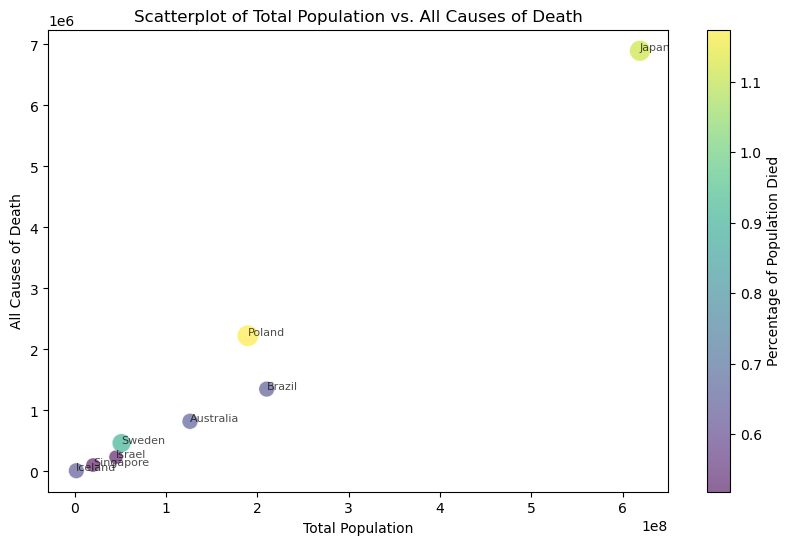

In [351]:

# Define the COVID ICD Codes
# covid_icd_codes = ['U07.1', 'U07.2']

# Filter the DataFrame for the specified ICD Codes and years 2020 and 2021
# df_covid_deaths = df_mort[(df_mort['ICD Code'].isin(covid_icd_codes)) & (df_mort['Year'].isin([2020, 2021]))]

# Group by Year + Country and Deaths
# df_grouped_deaths = df_covid_deaths.groupby(['Year', 'Country Name'])['Deaths: All Ages'].sum().reset_index()

# Rename columns
# df_grouped_deaths = df_grouped_deaths.rename(columns={'Deaths: All Ages': 'All Causes of Death'})

# Convert the 'All Causes of Death' column to integer
# df_grouped_deaths['All Causes of Death'] = df_grouped_deaths['All Causes of Death'].fillna(0).astype(int)


# Check if the required columns exist in the DataFrame
required_columns = ['Year', 'Country Name', 'Total Population', 'All Causes of Death', 'Percentage']
for col in required_columns:
    if col not in df_merged.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame")

# Print the initial DataFrame to check the raw data
print("Initial DataFrame:")
print(df_merged.head())

# Group by 'Country Name' and aggregate the relevant columns
df_aggregated = df_merged.groupby('Country Name').agg({
    'Total Population': lambda x: x.astype(str).str.replace(',', '').astype(float).sum(),
    'All Causes of Death': lambda x: x.astype(str).str.replace(',', '').astype(int).sum(),
    'Percentage': lambda x: x.astype(str).str.replace('%', '').astype(float).mean()
}).reset_index()

# Print the aggregated DataFrame to check the processed data
print("Aggregated DataFrame:")
print(df_aggregated.head())

# Extract the relevant columns from the aggregated DataFrame
countries = df_aggregated['Country Name']
total_population = df_aggregated['Total Population']
all_causes_of_death = df_aggregated['All Causes of Death']
percentage = df_aggregated['Percentage']

# Scale the percentage for bubble size
bubble_size = percentage * 100 * 2  # Adjust the scaling factor as needed

# Create the scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(total_population, all_causes_of_death, s=bubble_size, c=percentage, cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Percentage of Population Died')

# Add titles and labels
plt.title('Scatterplot of Total Population vs. All Causes of Death')
plt.xlabel('Total Population')
plt.ylabel('All Causes of Death')

# Annotate each point with the country name
for i, country in enumerate(countries):
    plt.annotate(country, (total_population[i], all_causes_of_death[i]), fontsize=8, alpha=0.7)

# Show the plot
plt.show()

Filtered DataFrame:
    Year Country Name     Total Population All Causes of Death Percentage
22  2020    Australia         25,649,248.0             161,300      0.63%
23  2020      Iceland            366,463.0               2,305      0.63%
24  2020       Israel  9,215,117.192000002              48,797      0.53%
25  2020        Japan        123,398,962.0           1,372,755      1.11%
26  2020       Poland         37,929,735.0             477,355      1.26%
27  2020    Singapore          4,044,210.0              20,985      0.52%
28  2020       Sweden         10,353,442.0              98,652      0.95%
29  2021    Australia         25,685,412.0             171,469      0.67%
30  2021      Iceland            372,520.0               2,333      0.63%
31  2021       Israel          9,371,368.0              50,772      0.54%
32  2021        Japan        122,780,487.0           1,439,856      1.17%
33  2021       Poland         37,737,212.0             519,517      1.38%
34  2021    Singap

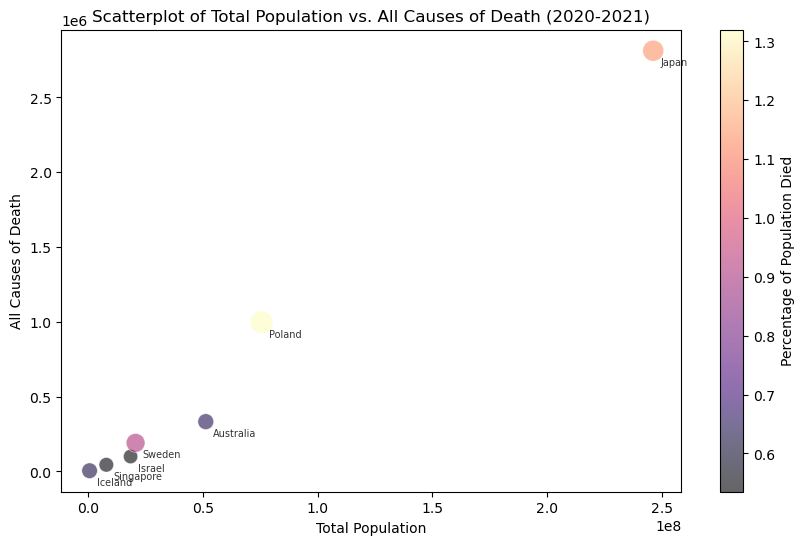

In [352]:

# Filter the DataFrame to include only the years 2020-2021
df_filtered = df_merged[df_merged['Year'].between(2020, 2021)]

# Check if the required columns exist in the filtered DataFrame
required_columns = ['Year', 'Country Name', 'Total Population', 'All Causes of Death', 'Percentage']
for col in required_columns:
    if col not in df_filtered.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame")

# Print the filtered DataFrame to check the raw data
print("Filtered DataFrame:")
print(df_filtered.head(30))

# Group by 'Country Name' and aggregate the relevant columns
df_aggregated = df_filtered.groupby('Country Name').agg({
    'Total Population': lambda x: x.astype(str).str.replace(',', '').astype(float).sum(),
    'All Causes of Death': lambda x: x.astype(str).str.replace(',', '').astype(int).sum(),
    'Percentage': lambda x: x.astype(str).str.replace('%', '').astype(float).mean()
}).reset_index()

# Print the aggregated DataFrame to check the processed data
print("Aggregated DataFrame:")
print(df_aggregated.head())

# Extract the relevant columns from the aggregated DataFrame
countries = df_aggregated['Country Name']
total_population = df_aggregated['Total Population']
all_causes_of_death = df_aggregated['All Causes of Death']
percentage = df_aggregated['Percentage']

# Scale the percentage for bubble size and multiply by 2
bubble_size = percentage * 100 * 2  # Adjust the scaling factor as needed

# Create the scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(total_population, all_causes_of_death, s=bubble_size, c=percentage, cmap='magma', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Percentage of Population Died')

# Add titles and labels
plt.title('Scatterplot of Total Population vs. All Causes of Death (2020-2021)')
plt.xlabel('Total Population')
plt.ylabel('All Causes of Death')

# Annotate each point with the country name at the bottom right of the bubble
for i, country in enumerate(countries):
    plt.annotate(country, 
                 (total_population[i], all_causes_of_death[i]), 
                 xytext=(5, -5),  # Offset position
                 textcoords='offset points', 
                 fontsize=7, 
                 alpha=0.8,
                 ha='left',  # Horizontal alignment
                 va='top')   # Vertical alignment

# Show the plot
plt.show()

In [353]:
japan_deaths = df_filtered[df_filtered['Country Name'] == 'Japan']
japan_deaths

,Year,Country Name,Total Population,All Causes of Death,Percentage
25,2020,Japan,"123,398,962.0","1,372,755",1.11%
32,2021,Japan,"122,780,487.0","1,439,856",1.17%


In [354]:
japan_2019 = print(f"The top causes of death for 2019 in Japan were:\n{top_causes_death_yearly(df_mort, 2019, 'Japan')}")
japan_2020 = print(f"The top causes of death for 2020 in Japan were:\n{top_causes_death_yearly(df_mort, 2020, 'Japan')}")
japan_2021 = print(f"The top causes of death for 2021 in Japan were:\n{top_causes_death_yearly(df_mort, 2021, 'Japan')}")

The top causes of death for 2019 in Japan were:
  ICD Code  Deaths: All Ages  \
0      R54            121863   
1     J189             88437   
2     I509             68062   
3     C349             60986   
4     J690             40356   
5     C169             36965   
6     I219             30267   
7     I639             28425   
8     I693             27252   
9     C220             21006   

                                        ICD Category  
0  Symptoms, signs and abnormal clinical and labo...  
1                        Respiratory system diseases  
2                        Circulatory system diseases  
3                                          Neoplasms  
4                        Respiratory system diseases  
5                                          Neoplasms  
6                        Circulatory system diseases  
7                        Circulatory system diseases  
8                        Circulatory system diseases  
9                                          Neopla

In [355]:
df_pop_country_filter = df_pop.groupby(['Country Name'])['Pop: All Ages'].sum().reset_index()
display(df_pop_country_filter)

,Country Name,Pop: All Ages
0,Australia,"1,193,216,388"
1,Brazil,"2,196,997,325"
2,Canada,"1,305,745,707"
3,Chile,"409,210,900"
4,Iceland,"17,747,054"
5,Israel,"351,254,892"
6,Japan,"8,161,134,795"
7,Poland,"2,512,949,184"
8,Singapore,"195,008,006"
9,Sweden,"622,009,800"


In [356]:
grouped_icd_df = df_mort.groupby(['Country Name','ICD Code'])['Deaths: All Ages'].sum().reset_index()
grouped_icd_df

,Country Name,ICD Code,Deaths: All Ages
0,Australia,A020,20
1,Australia,A021,12
2,Australia,A022,3
3,Australia,A028,1
4,Australia,A029,8
...,...,...,...
39397,United States of America,Y882,3
39398,United States of America,Y883,411
39399,United States of America,Y890,13
39400,United States of America,Y891,43


In [357]:
df_mort_filtered = df_mort[df_mort['ICD Code'] != 'AAA']
top_5_by_country_year = df_mort_filtered.groupby(['Year', 'Country Name']).apply(
    lambda x: x.nlargest(5, 'Deaths: All Ages')
).reset_index(drop=True)

# Display the result
top_5_by_country_year

/var/folders/rr/f4rnf7xj5tj1x2gknbjs4mxm0000gn/T/ipykernel_35637/239450045.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_by_country_year = df_mort_filtered.groupby(['Year', 'Country Name']).apply(


,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,5020,Australia,Oceania,2 - Female,F03,"Mental, behavioral, and neurodevelopmental dis...",104,5274,0,0,0,153,"3,694",0,0,"5,274"
1,2017,5020,Australia,Oceania,1 - Male,C349,Neoplasms,104,4828,0,0,94,"2,357","1,360",0,0,"4,828"
2,2017,5020,Australia,Oceania,1 - Male,I219,Circulatory system diseases,104,4038,0,2,153,"1,118","1,950",0,0,"4,038"
3,2017,5020,Australia,Oceania,1 - Male,I259,Circulatory system diseases,104,3738,0,3,60,847,"2,054",0,0,"3,738"
4,2017,5020,Australia,Oceania,2 - Female,I219,Circulatory system diseases,104,3492,0,0,36,402,"2,151",0,0,"3,492"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2021,2450,United States of America,North America,1 - Male,U071,Codes for special purposes,104,236610,44,"2,287","19,195","104,752","59,437",3,0,"236,610"
286,2021,2450,United States of America,North America,2 - Female,U071,Codes for special purposes,104,180283,47,"1,409","11,513","71,689","55,276",0,0,"180,283"
287,2021,2450,United States of America,North America,1 - Male,I251,Circulatory system diseases,104,94778,4,77,"2,006","31,756","40,249",1,0,"94,778"
288,2021,2450,United States of America,North America,2 - Female,G309,Nervous system diseases,104,77202,0,0,14,"5,642","50,761",0,0,"77,202"


,Country Name,Year,Deaths: All Ages
20,Iceland,2017,2236
21,Iceland,2018,2258
22,Iceland,2019,2277
23,Iceland,2020,2305
24,Iceland,2021,2333
53,United States of America,2017,2813503
54,United States of America,2018,2839205
55,United States of America,2019,2854838
56,United States of America,2020,3383729
57,United States of America,2021,3464231


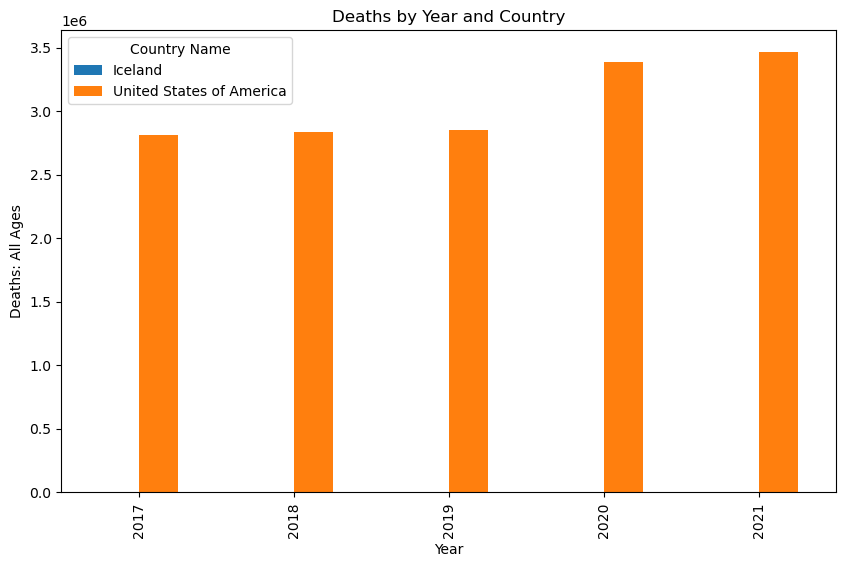

In [372]:
# Group by 'Country Name' and 'Year' and sum 'Deaths: All Ages'
df_filter_aaa = df_mort[df_mort['ICD Code'] != 'AAA']
df_grouped = df_filter_aaa.groupby(by=['Country Name', 'Year'])['Deaths: All Ages'].sum().reset_index()

# List of countries to filter
countries_to_include = ['United States of America', 'Iceland']

# Filter the DataFrame based on the list of countries
df_filtered = df_grouped[df_grouped['Country Name'].isin(countries_to_include)]

# Display the filtered DataFrame
display(df_filtered)

# Pivot the DataFrame to have 'Year' as the index and 'Country Name' as columns
df_pivot = df_filtered.pivot(index='Year', columns='Country Name', values='Deaths: All Ages')

# Plot the DataFrame with 'Year' as the x-axis and separate bars for each country
df_pivot.plot(kind='bar', figsize=(10, 6))

# Add titles and labels
plt.title('Deaths by Year and Country')
plt.xlabel('Year')
plt.ylabel('Deaths: All Ages')

# Show the plot
plt.show()

,Country Name,Year,Deaths: All Ages
5,Brazil,2017,1312664
6,Brazil,2018,1316719
7,Brazil,2019,1349801
8,Brazil,2020,1556824
9,Brazil,2021,1832649
30,Japan,2017,1340397
31,Japan,2018,1362470
32,Japan,2019,1381093
33,Japan,2020,1372755
34,Japan,2021,1439856


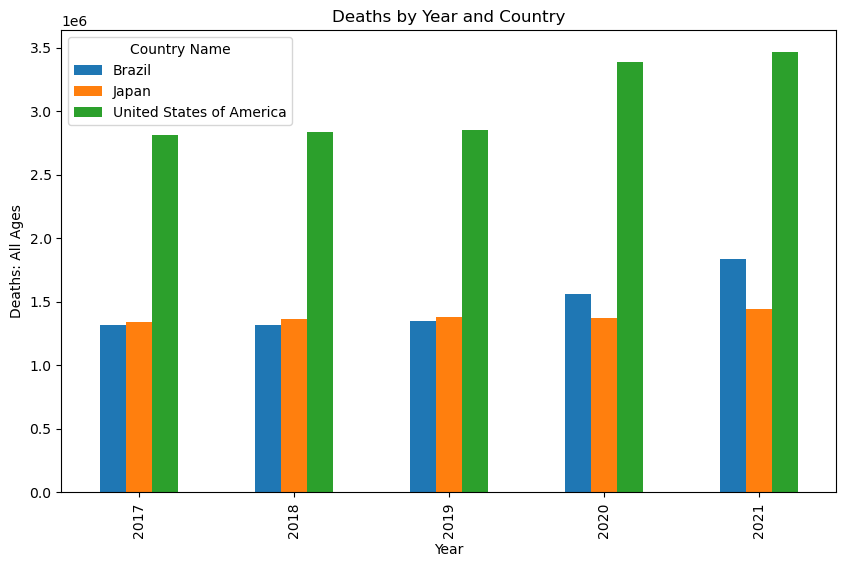

In [375]:
# Group by 'Country Name' and 'Year' and sum 'Deaths: All Ages'
df_filter_aaa = df_mort[df_mort['ICD Code'] != 'AAA']
df_grouped = df_filter_aaa.groupby(by=['Country Name', 'Year'])['Deaths: All Ages'].sum().reset_index()

# List of countries to filter
countries_to_include = ['United States of America', 'Brazil', 'Japan']

# Filter the DataFrame based on the list of countries
df_filtered = df_grouped[df_grouped['Country Name'].isin(countries_to_include)]

# Display the filtered DataFrame
display(df_filtered)

# Pivot the DataFrame to have 'Year' as the index and 'Country Name' as columns
df_pivot = df_filtered.pivot(index='Year', columns='Country Name', values='Deaths: All Ages')

# Plot the DataFrame with 'Year' as the x-axis and separate bars for each country
ax = df_pivot.plot(kind='bar', figsize=(10, 6), title='Deaths by Year and Country')

# Add labels
ax.set_xlabel('Year')
ax.set_ylabel('Deaths: All Ages')

# Show the plot
plt.show()

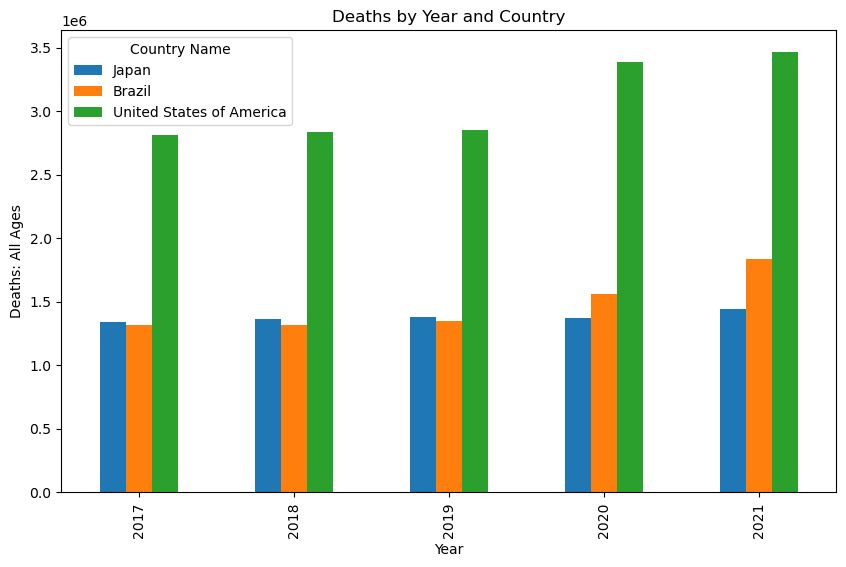

In [384]:
# Filter out rows where 'ICD Code' is 'AAA'
df_filter_aaa = df_mort[df_mort['ICD Code'] != 'AAA']

# List of countries to filter
countries_to_include = ['United States of America', 'Brazil', 'Japan']

# Filter the DataFrame based on the list of countries
df_filtered = df_filter_aaa[df_filter_aaa['Country Name'].isin(countries_to_include)]

# Pivot the DataFrame to have 'Year' as the index and 'Country Name' as columns, summing 'Deaths: All Ages'
df_pivot = df_filtered.pivot_table(index='Year', columns='Country Name', values='Deaths: All Ages', aggfunc='sum')

# Calculate the total number of deaths for each country and sort
total_deaths = df_pivot.sum().sort_values(ascending=True)

# Reorder the columns of the pivoted DataFrame based on the sorted order
df_pivot = df_pivot[total_deaths.index]

# Plot the DataFrame with 'Year' as the x-axis and separate bars for each country
pg = df_pivot.plot(kind='bar', figsize=(10, 6), title='Deaths by Year and Country')

# Add labels
pg.set_xlabel('Year')
pg.set_ylabel('Deaths: All Ages')

# Show the plot
plt.show()

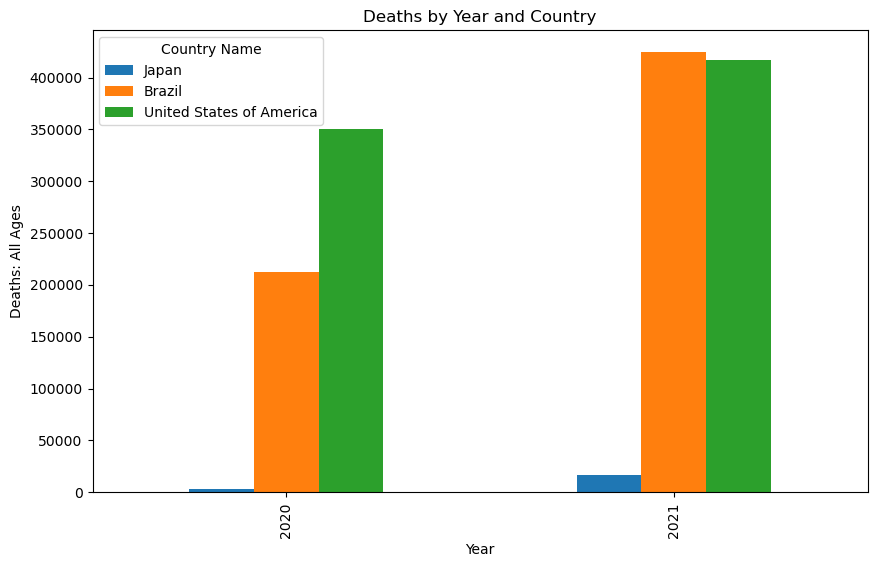

In [382]:

# COVID Bar Chart

# Filter the DataFrame to include only the specified ICD codes
df_filter_icd = df_mort[df_mort['ICD Code'].isin(['U071', 'U072'])]

# List of countries to filter
countries_to_include = ['United States of America', 'Brazil', 'Japan']

# Filter the DataFrame based on the list of countries
df_filtered = df_filter_icd[df_filter_icd['Country Name'].isin(countries_to_include)]

# Pivot the DataFrame to have 'Year' as the index and 'Country Name' as columns, summing 'Deaths: All Ages'
df_pivot = df_filtered.pivot_table(index='Year', columns='Country Name', values='Deaths: All Ages', aggfunc='sum')

# Calculate the total number of deaths for each country and sort
total_deaths = df_pivot.sum().sort_values(ascending=True)

# Reorder the columns of the pivoted DataFrame based on the sorted order
df_pivot = df_pivot[total_deaths.index]

# Plot the DataFrame with 'Year' as the x-axis and separate bars for each country
pg = df_pivot.plot(kind='bar', figsize=(10, 6), title='Deaths by Year and Country')

# Add labels
pg.set_xlabel('Year')
pg.set_ylabel('Deaths: All Ages')

# Show the plot
plt.show()

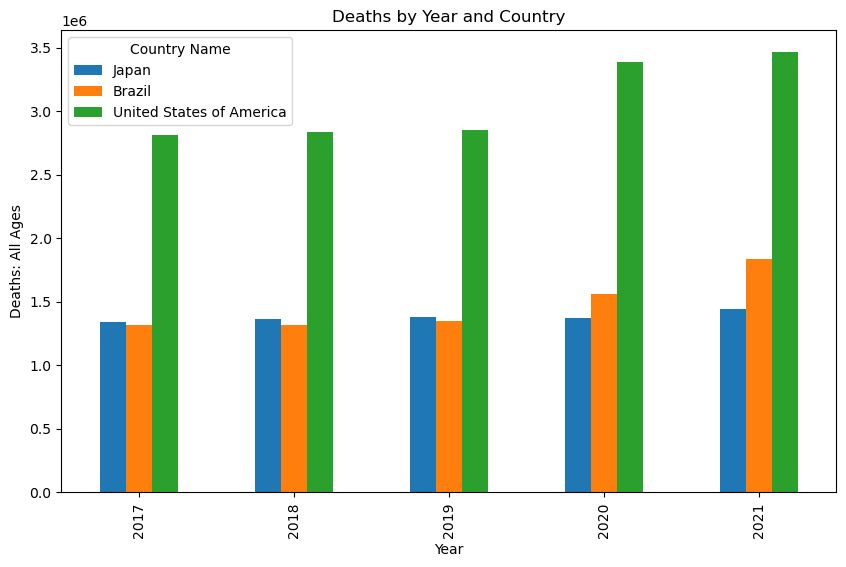

In [383]:
# All Deaths Bar Chart


# Filter out rows where 'ICD Code' is 'AAA'
df_filter_aaa = df_mort[df_mort['ICD Code'] != 'AAA']

# List of countries to filter
countries_to_include = ['United States of America', 'Brazil', 'Japan']

# Filter the DataFrame based on the list of countries
df_filtered = df_filter_aaa[df_filter_aaa['Country Name'].isin(countries_to_include)]

# Pivot the DataFrame to have 'Year' as the index and 'Country Name' as columns, summing 'Deaths: All Ages'
df_pivot = df_filtered.pivot_table(index='Year', columns='Country Name', values='Deaths: All Ages', aggfunc='sum')

# Calculate the total number of deaths for each country and sort
total_deaths = df_pivot.sum().sort_values(ascending=True)

# Reorder the columns of the pivoted DataFrame based on the sorted order
df_pivot = df_pivot[total_deaths.index]

# Plot the DataFrame with 'Year' as the x-axis and separate bars for each country
pg = df_pivot.plot(kind='bar', figsize=(10, 6), title='Deaths by Year and Country')

# Add labels
pg.set_xlabel('Year')
pg.set_ylabel('Deaths: All Ages')

# Show the plot
plt.show()